In [159]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

# Image Effects using Convolutional Filters and Kernels

In [160]:
path = 'C:\\bioinformatics_institute\\python\\images\\kitty.JPG'
img = plt.imread(path)

In [161]:
path = 'C:\\bioinformatics_institute\\python\\images\\f8692b4dde8249b26719f91e076aa8ab.jpg'
cat = plt.imread(path)

# Visualize image

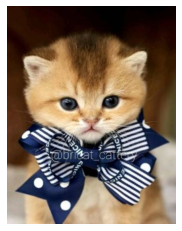

In [162]:
plt.imshow(img)
plt.axis('off')
plt.show()

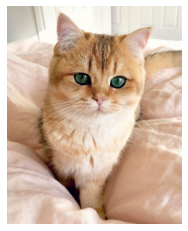

In [163]:
plt.imshow(cat)
plt.axis('off')
plt.show()

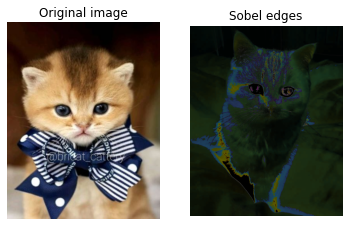

In [165]:
from skimage import filters
fig, (ax1, ax2) = plt.subplots(1,2)

edges = filters.sobel(image)

ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

ax2.imshow(edges, cmap='magma')
ax2.set_title('Sobel edges')
ax2.axis('off')
plt.show()


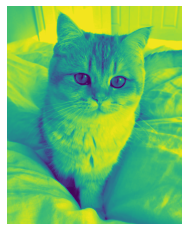

In [166]:
img = plt.imread(path)
plt.imshow(img.mean(2))
plt.axis('off')
plt.show()

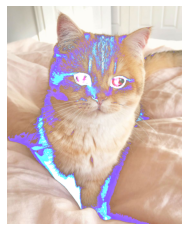

In [169]:
image = cat.copy()
mask = image < 87
image[mask]=255
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
# cat.flags

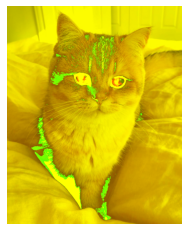

In [116]:
image[:, :, 2] = 0
plt.imshow(image)
plt.axis('off')
plt.show()

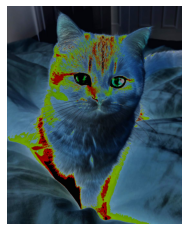

In [138]:
image = 1 - image
plt.imshow(image)
plt.axis('off')
plt.show()

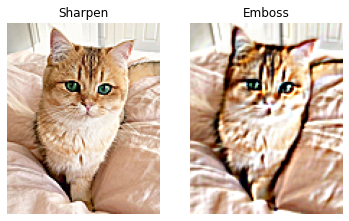

In [174]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

r_scaled = rescale(cat[:,:,0], 0.10)
g_scaled = rescale(cat[:,:,1], 0.10)
b_scaled = rescale(cat[:,:,2], 0.10)
cat_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)

# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])

kernels = [kernel7, kernel8]
kernel_name = ['Sharpen', 'Emboss']
figure, axis = plt.subplots(1, 2)

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = rgb_convolve2d(cat_scaled, 
                               kernel[::-1, ::-1]).clip(0,1)
     
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.axis('off')
    
     ax.set_title(name)


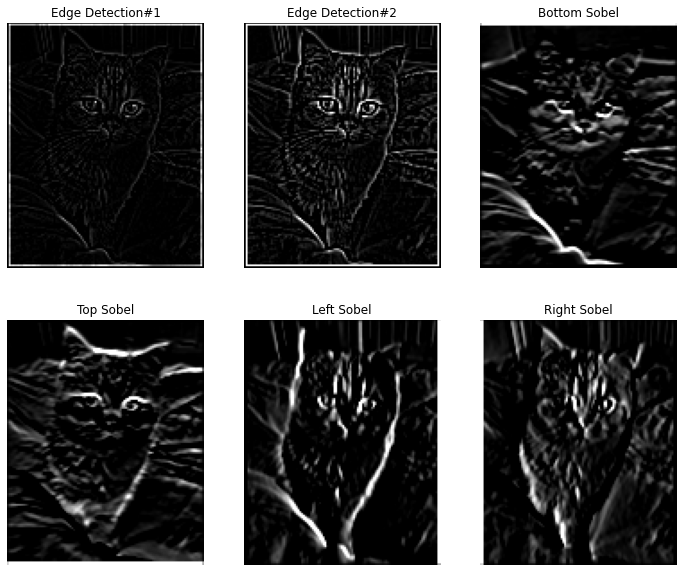

In [175]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)
cat_gray = rescale(rgb2gray(cat), 0.10)


# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']
figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(cat_gray, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.axis('off')
     ax.set_title(name)

# References
https://medium.com/swlh/image-processing-with-python-convolutional-filters-and-kernels-b9884d91a8fd  

https://medium.com/nuances-of-programming/10-%D0%B8%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2-python-%D0%B4%D0%BB%D1%8F-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B-%D1%81-%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC%D0%B8-1478612e7ade